## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## reading data set

In [2]:
df=pd.read_excel("dataset/data.xlsx")

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
x=df.values
x1=x[:,0:4]
y1=x[:,-1]

## splitting data into training and test 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3, random_state=42)

In [6]:
x_train1=x_train[:,0].reshape((-1,1))
x_train2=x_train[:,1].reshape((-1,1))
x_train3=x_train[:,2].reshape((-1,1))
x_train4=x_train[:,3].reshape((-1,1))
x_test1 =x_test[:,0].reshape((-1,1))
x_test2 =x_test[:,1].reshape((-1,1))
x_test3 =x_test[:,2].reshape((-1,1))
x_test4 =x_test[:,3].reshape((-1,1))

## shapes

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6697, 4), (6697,), (2871, 4), (2871,))

## plotting data using scatter plot

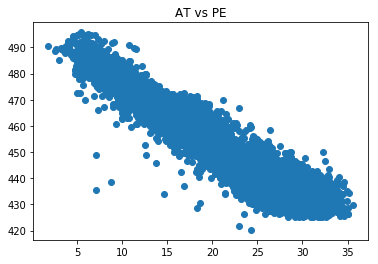

In [8]:
plt.scatter(x_train1,y_train)
plt.title("AT vs PE")
plt.show()

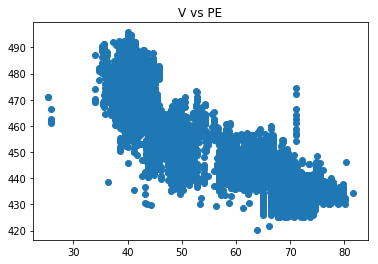

In [9]:
plt.scatter(x_train2,y_train)
plt.title("V vs PE")
plt.show()

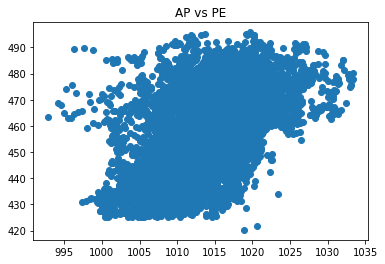

In [10]:
plt.scatter(x_train3,y_train)
plt.title("AP vs PE")
plt.show()

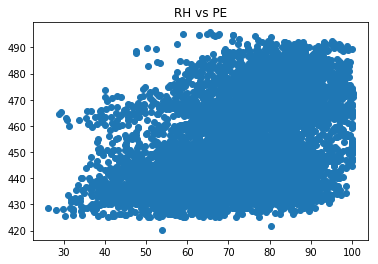

In [11]:
plt.scatter(x_train4,y_train)
plt.title("RH vs PE")
plt.show()

## defining modules

In [40]:
def getParams(x,y):
    Y=y.reshape(-1,1)
    n=Y.shape[0]
    x_=np.mean(x)
    y_=np.mean(Y)
    b1=(np.sum(x*Y)-n*x_*y_)/(np.sum(x*x)-n*x_*x_)
    b0=y_-b1*x_
    return b0,b1

def predict(x,b0,b1):
    y=b0+b1*x
    return y

def plot(x,y,y_):
    plt.scatter(x,y)
    plt.plot(x,y_,c='red')
    plt.show()
def error(y,y_):
    m=y.shape[0]
    return np.sqrt(np.sum((y_-y)*(y_-y))/m)    

## AT VS PE

error  1270.8119953996963
coefficient by sklearn :  497.17033522077134 -2.1790777085375272
coefficient by simple reg :  497.17033522077065 -2.1790777085374913


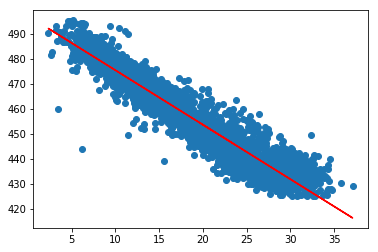

In [41]:
b0,b1=getParams(x_train1,y_train)
y_=predict(x_test1,b0,b1)
print("error ",error(y_test,y_))
validate(x_train1,y_train,b0,b1)
plot(x_test1,y_test,y_)

## V VS PE

error  1216.2751170189517
coefficient by sklearn :  517.6668699389594 -1.1663795778068287
coefficient by simple reg :  517.666869938957 -1.1663795778067851


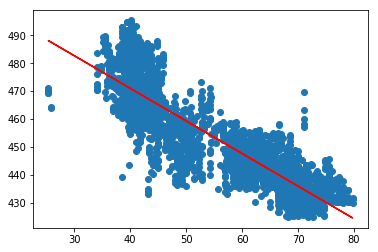

In [42]:
b0,b1=getParams(x_train2,y_train)
y_=predict(x_test2,b0,b1)
print("error ",error(y_test,y_))
validate(x_train2,y_train,b0,b1)
plot(x_test2,y_test,y_)

## AP VS PE

error  1027.9876988303745
coefficient by sklearn :  -1027.0044410344751 1.4620653375857051
coefficient by simple reg :  -1027.0044410386834 1.4620653375898582


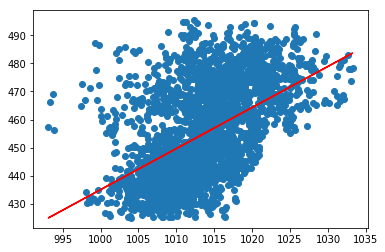

In [43]:
b0,b1=getParams(x_train3,y_train)
y_=predict(x_test3,b0,b1)
print("error ",error(y_test,y_))
validate(x_train3,y_train,b0,b1)
plot(x_test3,y_test,y_)

## RH VS PE

error  983.0344655727708
coefficient by sklearn :  421.06669019815234 0.45456801705198924
coefficient by simple reg :  421.06669019815155 0.45456801705200006


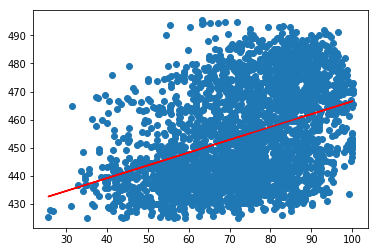

In [44]:
b0,b1=getParams(x_train4,y_train)
y_=predict(x_test4,b0,b1)
print("error ",error(y_test,y_))
validate(x_train4,y_train,b0,b1)
plot(x_test4,y_test,y_)

## cross validate

In [45]:
from sklearn.linear_model import LinearRegression

In [38]:
def validate(x_train,y_train,b0,b1):
    reg = LinearRegression().fit(x_train, y_train)
    print("coefficient by sklearn : ",reg.intercept_,*reg.coef_)
    print("coefficient by simple reg : ",b0,b1)
    
    

In [39]:
validate(x_train4,y_train,b0,b1)

coefficient by sklearn :  421.06669019815234 0.45456801705198924
coefficient by simple reg :  421.06669019815155 0.45456801705200006
